#Preparación de los datos

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('/content/datos_tratados.csv')
df.head()

,customerID,abandono,genero,ciudadano_senior,tiene_pareja,tiene_dependientes,meses_con_compania,servicio_telefonico,lineas_multiples,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,facturacion_electronica,metodo_pago,facturacion_mensual,facturacion_total,cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [87]:
df['genero'] = df['genero'].replace({'Male': 1, 'Female': 0})

/tmp/ipython-input-1159865388.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['genero'] = df['genero'].replace({'Male': 1, 'Female': 0})


In [88]:
df['ciudadano_senior'].unique()

array([0, 1])

In [89]:
datos = df.drop(['customerID','tipo_contrato'],axis=1)
datos.head()

,abandono,genero,ciudadano_senior,tiene_pareja,tiene_dependientes,meses_con_compania,servicio_telefonico,lineas_multiples,tipo_internet,seguridad_online,respaldo_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,facturacion_electronica,metodo_pago,facturacion_mensual,facturacion_total,cuentas_diarias
0,0,0,0,1,1,9,1,0,DSL,0,1,0,1,1,0,1,Mailed check,65.6,593.30,2.186667
1,0,1,0,0,0,9,1,1,DSL,0,0,0,0,0,1,0,Mailed check,59.9,542.40,1.996667
2,1,1,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,1,Electronic check,73.9,280.85,2.463333
3,1,1,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,1,Electronic check,98.0,1237.85,3.266667
4,1,0,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,1,Mailed check,83.9,267.40,2.796667


In [90]:
datos.columns

Index(['abandono', 'genero', 'ciudadano_senior', 'tiene_pareja',
       'tiene_dependientes', 'meses_con_compania', 'servicio_telefonico',
       'lineas_multiples', 'tipo_internet', 'seguridad_online',
       'respaldo_online', 'proteccion_dispositivo', 'soporte_tecnico',
       'streaming_tv', 'streaming_peliculas', 'facturacion_electronica',
       'metodo_pago', 'facturacion_mensual', 'facturacion_total',
       'cuentas_diarias'],
      dtype='object')

In [91]:
#Existen columnas con filas que contienen "No internet service", lo cual sería lo mismo a decir "no"

df_limpio = datos.copy()

cols_to_fix = [
    'seguridad_online','respaldo_online', 'proteccion_dispositivo',
    'soporte_tecnico','streaming_tv', 'streaming_peliculas'
]

for col in cols_to_fix:
    df_limpio[col] = df_limpio[col].replace('No internet service', 'No')

In [94]:
categorical_cols = [
    'genero', 'ciudadano_senior', 'tiene_pareja', 'tiene_dependientes',
    'lineas_multiples', 'tipo_internet','seguridad_online',
    'respaldo_online', 'proteccion_dispositivo','soporte_tecnico',
    'streaming_tv', 'streaming_peliculas', 'metodo_pago'
]

df_encoded = pd.get_dummies(df_limpio,
                            columns=categorical_cols,
                            drop_first=True)

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   abandono                             7256 non-null   int64  
 1   meses_con_compania                   7256 non-null   int64  
 2   servicio_telefonico                  7256 non-null   int64  
 3   facturacion_electronica              7256 non-null   int64  
 4   facturacion_mensual                  7256 non-null   float64
 5   facturacion_total                    7256 non-null   float64
 6   cuentas_diarias                      7256 non-null   float64
 7   genero_1                             7256 non-null   bool   
 8   ciudadano_senior_1                   7256 non-null   bool   
 9   tiene_pareja_1                       7256 non-null   bool   
 10  tiene_dependientes_1                 7256 non-null   bool   
 11  lineas_multiples_1            

In [95]:
df_encoded = df_encoded.drop(columns=[
    'streaming_peliculas_1', 'streaming_peliculas_No',
    'streaming_tv_1', 'streaming_tv_No',
    'soporte_tecnico_1', 'soporte_tecnico_No',
    'proteccion_dispositivo_1', 'proteccion_dispositivo_No',
    'respaldo_online_1', 'respaldo_online_No',
    'seguridad_online_1', 'seguridad_online_No'
])

In [96]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   abandono                             7256 non-null   int64  
 1   meses_con_compania                   7256 non-null   int64  
 2   servicio_telefonico                  7256 non-null   int64  
 3   facturacion_electronica              7256 non-null   int64  
 4   facturacion_mensual                  7256 non-null   float64
 5   facturacion_total                    7256 non-null   float64
 6   cuentas_diarias                      7256 non-null   float64
 7   genero_1                             7256 non-null   bool   
 8   ciudadano_senior_1                   7256 non-null   bool   
 9   tiene_pareja_1                       7256 non-null   bool   
 10  tiene_dependientes_1                 7256 non-null   bool   
 11  lineas_multiples_1            

#Análisis de datos

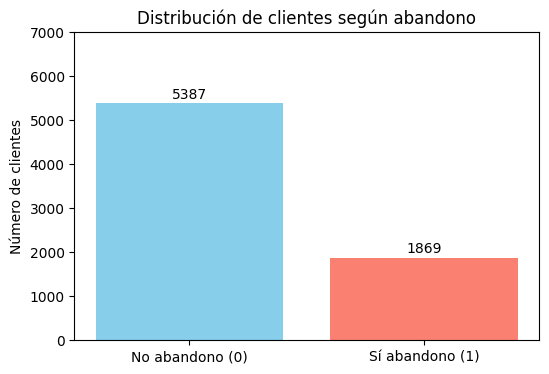

In [97]:
# Valores absolutos
counts_abs = df_encoded['abandono'].value_counts()

plt.figure(figsize=(6,4))
bars = plt.bar(counts_abs.index, counts_abs.values, color=['skyblue', 'salmon'])
plt.xticks([0,1], ['No abandono (0)', 'Sí abandono (1)'])
plt.ylabel("Número de clientes")
plt.ylim(0,7000)
plt.title("Distribución de clientes según abandono")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center', va='bottom')

plt.show()

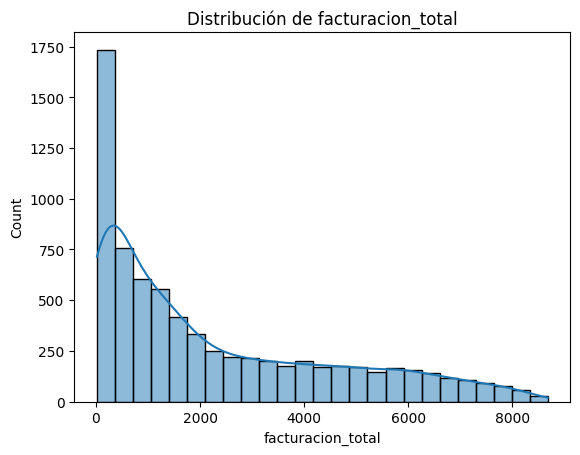

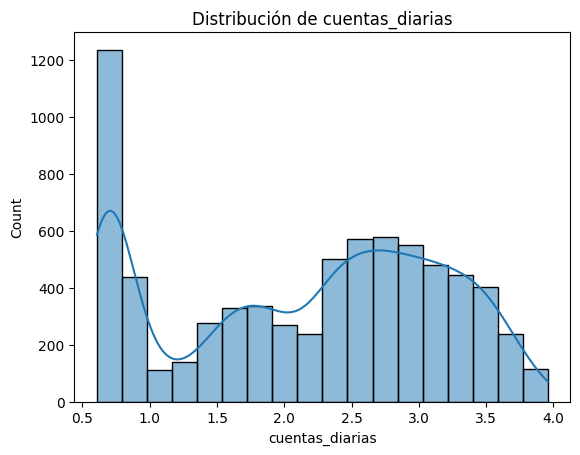

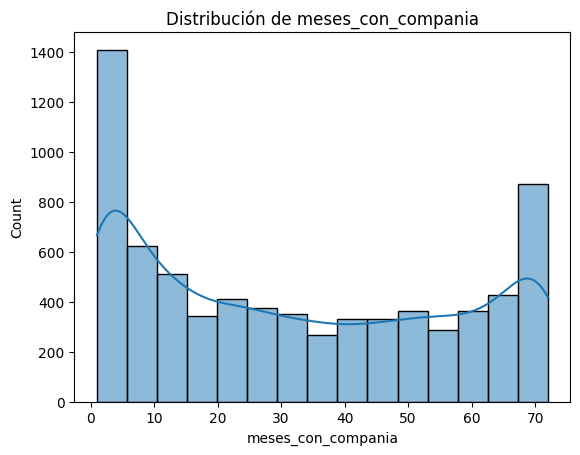

In [98]:
for col in ['facturacion_total', 'cuentas_diarias', 'meses_con_compania']:
    sns.histplot(df_encoded[col], kde=True)
    plt.title(f"Distribución de {col}")
    plt.show()

In [115]:
from sklearn.preprocessing import MinMaxScaler

df_scaled = df_encoded.copy()

df_scaled['facturacion_total'] = np.log1p(df_scaled['facturacion_total'])

cols_a_normalizar = ['facturacion_total', 'cuentas_diarias', 'meses_con_compania']

scaler = MinMaxScaler()
df_scaled[cols_a_normalizar] = scaler.fit_transform(df_scaled[cols_a_normalizar])

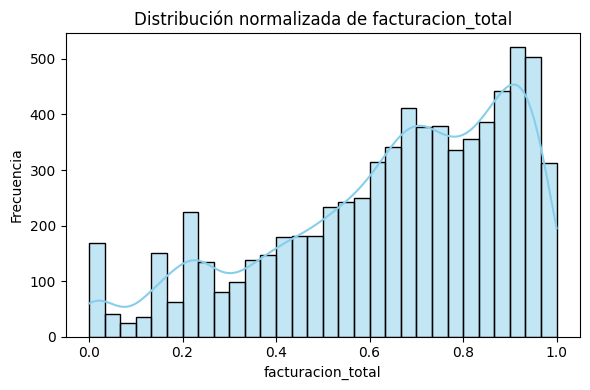

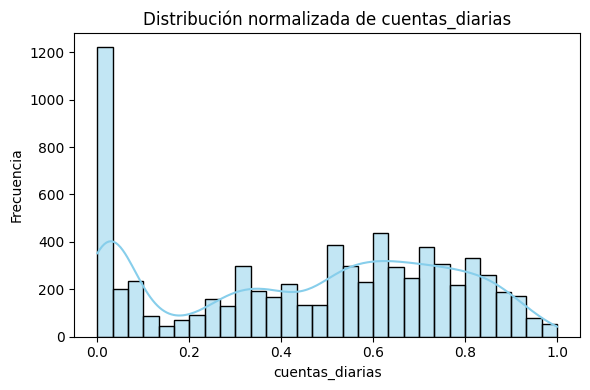

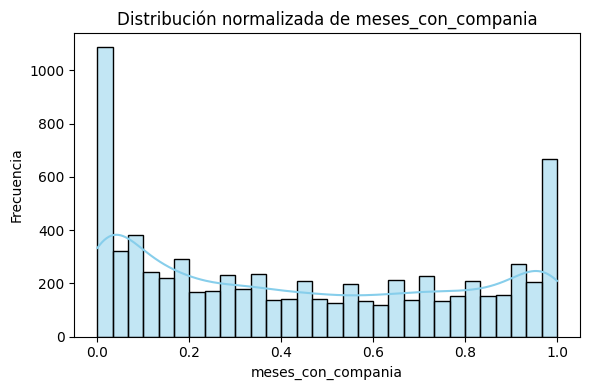

In [100]:
for col in cols_a_normalizar:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_scaled[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribución normalizada de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

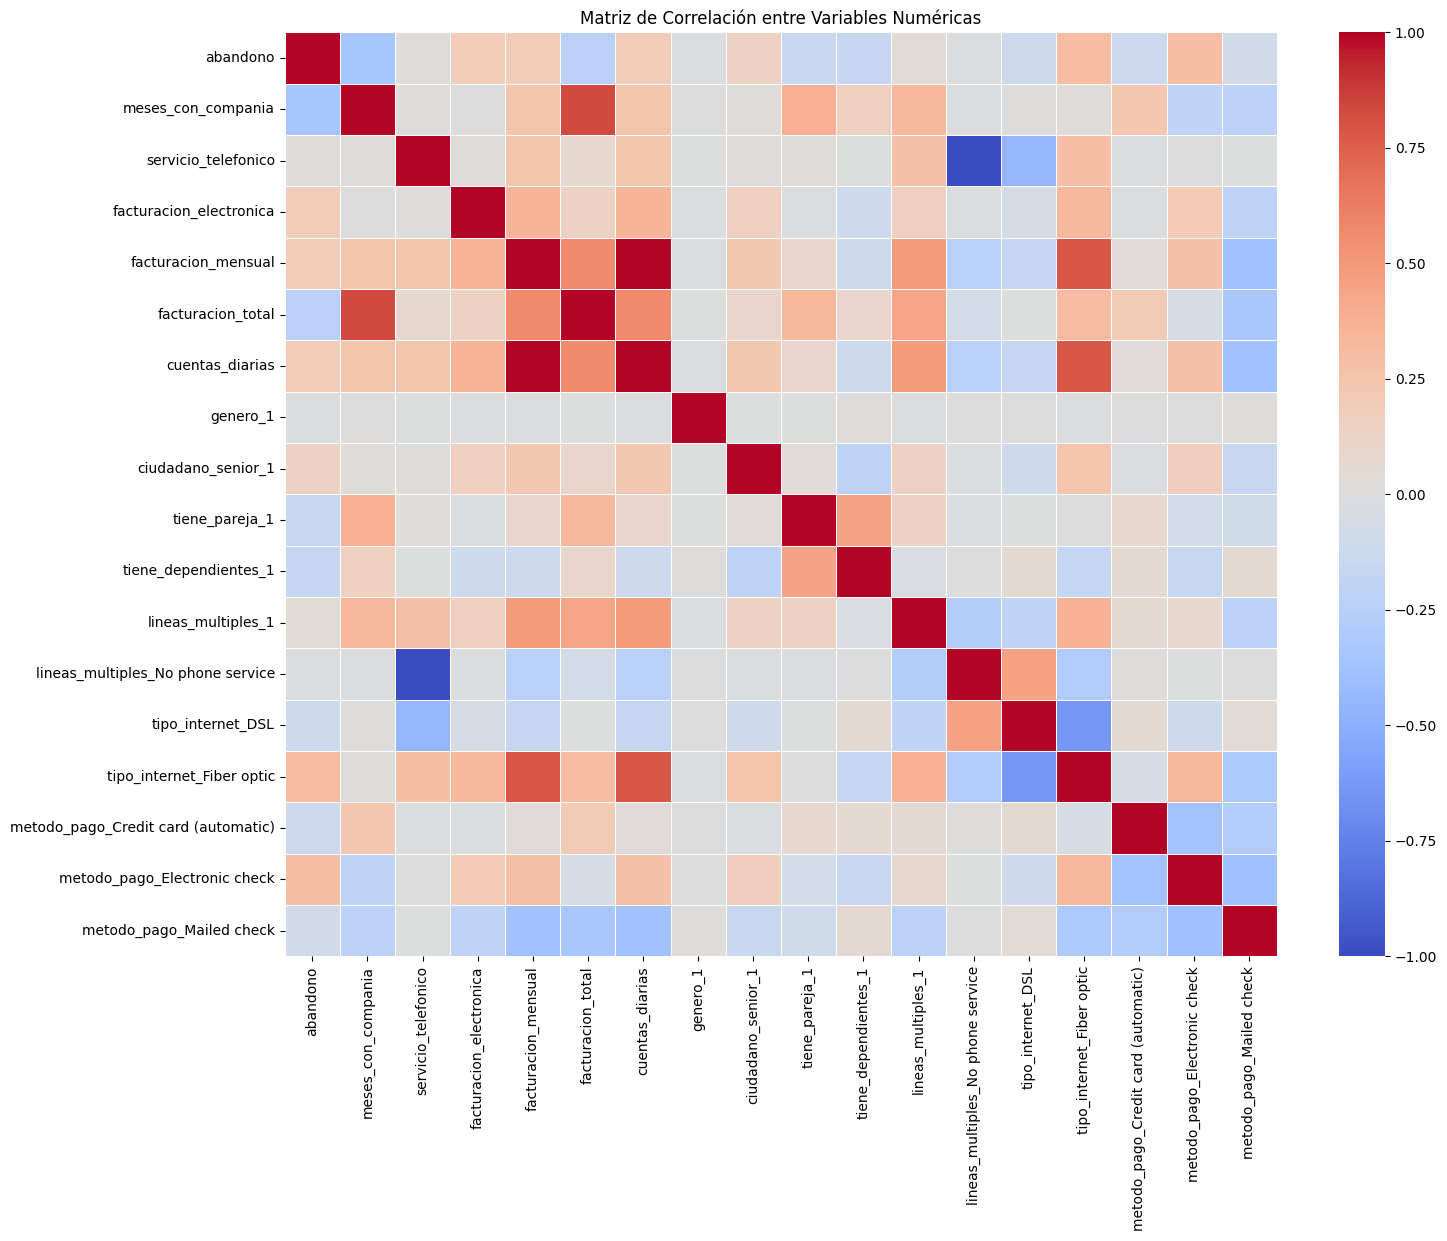

In [101]:
# Calculamos la matriz de correlación solo con variables numéricas
correlation_matrix = df_scaled.corr(numeric_only=True)

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=False, fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

In [102]:
cor_abandono = correlation_matrix['abandono'].sort_values(key=abs, ascending=False)
print(cor_abandono)

abandono                               1.000000
meses_con_compania                    -0.345799
tipo_internet_Fiber optic              0.300416
metodo_pago_Electronic check           0.294181
facturacion_total                     -0.235213
cuentas_diarias                        0.189393
facturacion_mensual                    0.189393
facturacion_electronica                0.186309
tiene_dependientes_1                  -0.160347
tiene_pareja_1                        -0.148106
ciudadano_senior_1                     0.146400
metodo_pago_Credit card (automatic)   -0.131448
tipo_internet_DSL                     -0.119945
metodo_pago_Mailed check              -0.089198
lineas_multiples_1                     0.039277
servicio_telefonico                    0.012337
lineas_multiples_No phone service     -0.012337
genero_1                              -0.009494
Name: abandono, dtype: float64


/tmp/ipython-input-82430874.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='abandono', y='meses_con_compania', data=df_scaled, palette='Set2')


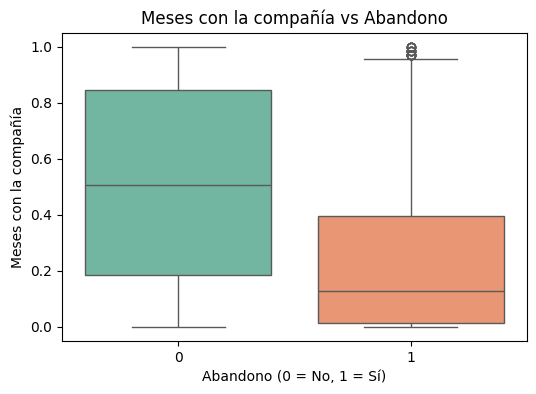

In [103]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='abandono', y='meses_con_compania', data=df_scaled, palette='Set2')
plt.title("Meses con la compañía vs Abandono")
plt.xlabel("Abandono (0 = No, 1 = Sí)")
plt.ylabel("Meses con la compañía")
plt.show()

/tmp/ipython-input-2719419420.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='abandono', y='facturacion_total', data=df_scaled, palette='Set3')


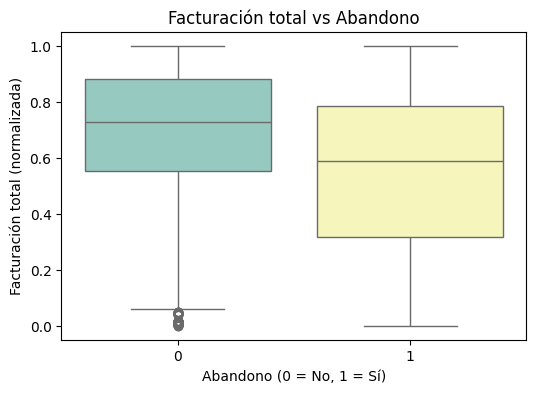

In [104]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='abandono', y='facturacion_total', data=df_scaled, palette='Set3')
plt.title("Facturación total vs Abandono")
plt.xlabel("Abandono (0 = No, 1 = Sí)")
plt.ylabel("Facturación total (normalizada)")
plt.show()

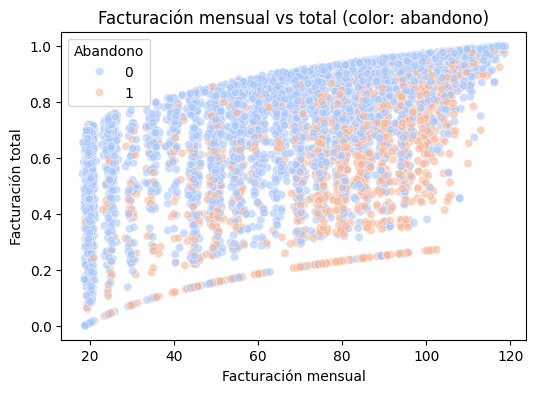

In [105]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_scaled, x='facturacion_mensual', y='facturacion_total', hue='abandono', palette='coolwarm', alpha=0.6)
plt.title("Facturación mensual vs total (color: abandono)")
plt.xlabel("Facturación mensual")
plt.ylabel("Facturación total")
plt.legend(title='Abandono')
plt.show()

#Creación de modelo

In [106]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop('abandono', axis=1)
y = df_scaled['abandono']

# División 70% entrenamiento / 30% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Regresión Logística:")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Regresión Logística:
[[1482  134]
 [ 290  271]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.87      1616
           1       0.67      0.48      0.56       561

    accuracy                           0.81      2177
   macro avg       0.75      0.70      0.72      2177
weighted avg       0.79      0.81      0.79      2177



In [120]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest:
[[1438  178]
 [ 302  259]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1616
           1       0.59      0.46      0.52       561

    accuracy                           0.78      2177
   macro avg       0.71      0.68      0.69      2177
weighted avg       0.77      0.78      0.77      2177



In [112]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluar_modelo(y_true, y_pred, nombre_modelo="Modelo"):
    print(f"\n Evaluación del {nombre_modelo}:")
    print("Exactitud (Accuracy):", accuracy_score(y_true, y_pred))
    print("Precisión:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-Score:", f1_score(y_true, y_pred))
    print("Matriz de Confusión:\n", confusion_matrix(y_true, y_pred))


In [113]:
evaluar_modelo(y_test, y_pred_log, "Regresión Logística")


 Evaluación del Regresión Logística:
Exactitud (Accuracy): 0.8052365640790078
Precisión: 0.6691358024691358
Recall: 0.483065953654189
F1-Score: 0.5610766045548654
Matriz de Confusión:
 [[1482  134]
 [ 290  271]]


In [114]:
evaluar_modelo(y_test, y_pred_rf, "Random Forest")


 Evaluación del Random Forest:
Exactitud (Accuracy): 0.7795130914101975
Precisión: 0.5926773455377574
Recall: 0.46167557932263814
F1-Score: 0.5190380761523046
Matriz de Confusión:
 [[1438  178]
 [ 302  259]]


In [123]:
coeficientes = pd.Series(log_model.coef_[0], index=X_train.columns)

coef_ordenados = coeficientes.sort_values(key=abs, ascending=False)

print("Coeficientes más influyentes:")
print(coef_ordenados.head(15))

Coeficientes más influyentes:
facturacion_total                     -2.736849
meses_con_compania                    -1.656092
tipo_internet_Fiber optic              1.623631
tipo_internet_DSL                      0.705731
servicio_telefonico                   -0.592146
facturacion_electronica                0.525971
lineas_multiples_1                     0.408153
metodo_pago_Electronic check           0.403306
ciudadano_senior_1                     0.396763
tiene_dependientes_1                  -0.198110
metodo_pago_Mailed check              -0.144623
metodo_pago_Credit card (automatic)   -0.130897
cuentas_diarias                        0.105885
genero_1                              -0.073818
tiene_pareja_1                         0.039106
dtype: float64


In [122]:
importancias_rf = pd.Series(rf_model.feature_importances_, index=X_train.columns)

importancias_ordenadas = importancias_rf.sort_values(ascending=False)

print("Variables más importantes según Random Forest:")
print(importancias_ordenadas.head(15))

Variables más importantes según Random Forest:
facturacion_total                      0.211107
meses_con_compania                     0.184397
facturacion_mensual                    0.170456
cuentas_diarias                        0.167473
tipo_internet_Fiber optic              0.045947
metodo_pago_Electronic check           0.040630
facturacion_electronica                0.027249
genero_1                               0.026850
tiene_pareja_1                         0.021986
ciudadano_senior_1                     0.021579
lineas_multiples_1                     0.019997
tiene_dependientes_1                   0.018887
metodo_pago_Mailed check               0.012658
metodo_pago_Credit card (automatic)    0.012369
tipo_internet_DSL                      0.010667
dtype: float64


#Conclusiones

En base a los diferentes análisis realizados, se tiene lo siguiente el siguiente análisis comparativo:

1. Exactitud (Accuracy): Regresión Logística tiene una mayor exactitud: 80.5% vs 77.9%, lo que indica que clasifica correctamente más casos.

2. Recall (Sensibilidad): Regresión logística tiene una valor mayor de 48.3% vs 46.2%, en donde se midio cuántos abandonos reales logró detectar.

3. Precisión: Regresión Logística también tiene una mejor precisión: 66.9% vs 59.3%, dando a entender que comete menos falsos positivos al predecir "abandono".

4. F1-Score: Regresión logística tiene un mejor equilibrio

5. Matriz de confusión: Ambos modelos pierden muchos abandonos reales, pero Regresión Logística los detecta un poco mejor.

Como factores más importantes a la hora de que los clientes abandonen o no a la empresa se tiene el tipo de fibra optica y el tipo de internet, en parte, también se tiene la facturación electrónica.

Se recomienda revisar los servicos de internet con el propósito de establecer mejoras y así poder retener clientes, en cuanto a la facturación electrónica, podría ser una buena opción eliminar esta, pero se deja a desición del empleador.

Por otra parte, se tiene que los clientes que tienen mayor tiempo con la empresa, no la abandonan.